# Training a binary model for identifying images of 1

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784',version=1)

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist['data'], mnist['target'].astype(np.uint8)

### Sample the Data

In [6]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [7]:
X[0].shape

(784,)

In [8]:
some_img=X[0].reshape(28,28)

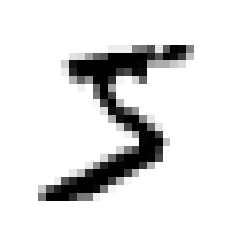

In [9]:
plt.imshow(some_img, cmap='binary')
plt.axis('off')
plt.show()

In [10]:
y[0]

5

In [11]:
len(X)

70000

### Split the data into train and test

Data is already shuffled
we will split 60,000:10,000 for train:test

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
y_train_1=(y_train==1)
y_test_1=(y_test==1)

### I will compare three models: SDGClassifier, RandomForestClassifier, and a dumb classifier
While it is evident that RF model will work better, this is to demonstrate which metrics to use for model selection.

In [14]:
from sklearn.linear_model import SGDClassifier

In [15]:
sgd_clf = SGDClassifier(random_state=42)

In [16]:
sgd_clf.fit(X_train,y_train_1)

SGDClassifier(random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf_clf=RandomForestClassifier(random_state=42)

In [19]:
rf_clf.fit(X_train,y_train_1)

RandomForestClassifier(random_state=42)

In [20]:
from sklearn.base import BaseEstimator

In [21]:
class Never1Classifier(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)


As the name reflects, this dumb classifier marks all images as not 5. There is an important point about which metrics to use for classification using this.

In [22]:
n1_clf=Never1Classifier()

In [23]:
n1_clf.fit(X_train, y_train_1)

Never1Classifier()

### Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [25]:
cross_val_score(sgd_clf,X_train,y_train_1,cv=3,scoring='accuracy')

array([0.9878 , 0.98095, 0.99005])

In [26]:
cross_val_score(rf_clf,X_train,y_train_1,cv=3,scoring='accuracy')

array([0.99485, 0.9954 , 0.99555])

The SGD model has accuracy above 98 for each fold, and the RF model above 99. How good is it?

In [27]:
cross_val_score(n1_clf,X_train,y_train_1,cv=3,scoring='accuracy')

array([0.88595, 0.8859 , 0.89105])

The dumb classifier got an accuracy of 88.59%, simply because 1's form less than 12% of the data likely.

Clearly, we need to measure the performance of model using different measures, some of these are: _precision_ and _recall_.

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
y_train_pred_sgd=sgd_clf.predict(X_train)

In [30]:
y_train_pred_rf=rf_clf.predict(X_train)

In [31]:
y_train_pred_n1=n1_clf.predict(X_train)

In [32]:
confusion_matrix(y_train_1,y_train_pred_n1)

array([[53258,     0],
       [ 6742,     0]], dtype=int64)

The first row of the matrix means that there were 53258 non-1s and they were always classified as non-1. 0 of them were classified as 1. The second row means that there were 6742 1s that were classified as non-1, 0 were classified as 1. In terms of errors:

[[True Negatives , False Negatives],
 [False Positives, True Positives ]]
 
 Then, precision is among the ones we predicted to be 1, how many are truly 1:
 TP/(TP+FN)
 
 Recall is of the actual 1s, how many were we able to identify:
 TP/(TP+FP)
 
 For the n1 model both precision and recall are 0, by design.

In [33]:
confusion_matrix(y_train_1,y_train_pred_sgd)

array([[52756,   502],
       [   94,  6648]], dtype=int64)

In [34]:
confusion_matrix(y_train_1,y_train_pred_rf)

array([[53258,     0],
       [    0,  6742]], dtype=int64)

clearly, the rf model has 100% recall and precision.

In [35]:
from sklearn.metrics import precision_score, recall_score

In [36]:
precision_score(y_train_1,y_train_pred_rf), recall_score(y_train_1,y_train_pred_rf)

(1.0, 1.0)

The SGD model is interesting, in that there is more about descision making to learn there.

In [37]:
precision_score(y_train_1,y_train_pred_sgd), recall_score(y_train_1,y_train_pred_sgd)

(0.9297902097902098, 0.9860575496885198)

In [38]:
from sklearn.metrics import precision_recall_curve

In [39]:
y_score_sgd=cross_val_predict(sgd_clf,X_train,y_train_1,cv=3, method='decision_function')

In [40]:
precision, recall, threshold = precision_recall_curve(y_train_1,y_score_sgd)

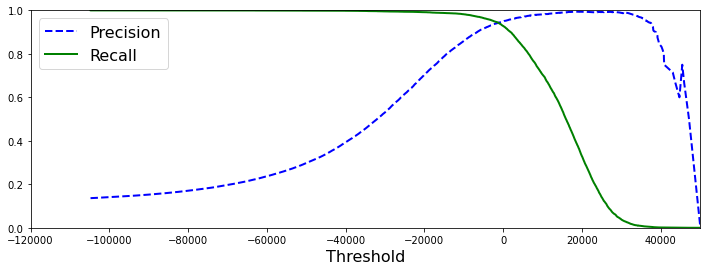

In [41]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])
    
plt.figure(figsize=(12, 4))
plot_precision_recall_vs_threshold(precision, recall, threshold)
plt.xlim([-120000, 50000])
plt.show()


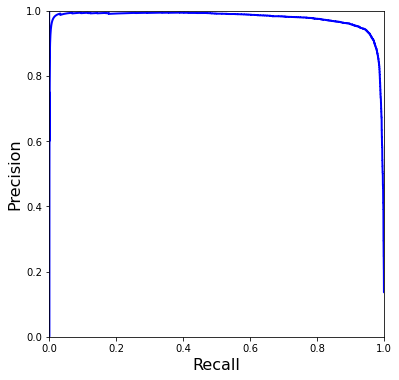

In [42]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(6, 6))
plot_precision_vs_recall(precision, recall)
plt.show()

Search for lowest threshold (_th1_) that gives .50 recall 

Then search for lowest threshold (_th2_) above _th1_ one that gives .95 precision

In [43]:
thr_50_recall=threshold[np.argmax(recall>=0.5)]
thr_50_recall

-104763.01316771393

In [44]:
threshold_1=threshold[threshold>thr_50_recall]

In [45]:
thr_95_pre=threshold_1[np.argmax(precision>=0.95)]
thr_95_pre

172.03608833187144

In [47]:
y_train_pred_sgd_95=(y_score_sgd>=thr_95_pre)

In [48]:
precision_score(y_train_1,y_train_pred_sgd_95)

0.9502358849490185

In [49]:
recall_score(y_train_1,y_train_pred_sgd_95)

0.9261346781370513

Thus the threshold we need is 172.04 at which precision improves from 92, at threshold 0, to 95. The cost is reducing recall from 98 to 92.6

In [50]:
y_train_pred_sgd2=sgd_clf.predict(X_train)

In [51]:
y_train_pred_sgd2

array([False, False, False, ..., False, False, False])

# Prediction on Test Data

Prediction, RandomForestClassifier

In [52]:
y_test_pred_1_rf=rf_clf.predict(X_test)

In [53]:
precision_score(y_test_1,y_test_pred_1_rf), recall_score(y_test_1,y_test_pred_1_rf)

(0.9964093357271095, 0.9779735682819384)